## → Diccionario de Datos:

- ##### *Contenido_de_Nitrogeno:* Proporción de contenido de nitrógeno en el suelo.
- ##### *Contenido_de_Fosforo:* Proporción de contenido de fósforo en el suelo.
- ##### *Contenido_de_Potasio:* Proporción de contenido de potasio en el suelo.
- ##### *Temperatura_C:* Temperatura en grados Celsius.
- ##### *Humedad_Relativa:* Humedad relativa en porcentaje.
- ##### *Nivel_de_pH:* Nivel de pH del suelo.
- ##### *Precipitacion_mm:* Cantidad de precipitación en milímetros.
- ##### *Tipo_de_Cultivo:* Tipo de cultivo recomendado en función de los parámetros anteriores.


#### El uso de Machine Learning en la agricultura es vital para optimizar rendimientos, mejorar la sostenibilidad y minimizar riesgos. Esto es particularmente relevante en Argentina, donde la agricultura es un pilar económico. Saber qué tipo de cultivo es más adecuado para ciertas condiciones del suelo y del clima puede tener un impacto significativo en la productividad y la sostenibilidad.

## → a. Análisis Exploratorio de Datos (EDA)
#### Para realizar un EDA exhaustivo del dataset, considere las siguientes preguntas:
#### ¿Cómo se distribuyen los valores en cada una de las variables?
#### ¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?
#### ¿Cómo varía la recomendación de cultivo según las condiciones del suelo y el clima?
#### ¿Existen valores atípicos o faltantes que deban ser tratados?

## → b. Machine Learning

#### En esta sección, implementaremos dos modelos de Machine Learning para predecir el Tipo_de_Cultivo basándonos en las variables del suelo y del clima. Utilizaremos una Regresión Logística y un Árbol de Decisión. 

#### Consigna para la Implementación del Código: Utilice el siguiente código de Python como base para implementar el modelo de Árbol de Decisión:

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el modelo
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2,
max_depth=5)
# Validación cruzada
score = cross_val_score(decision_tree_model, features, target, cv=5)
print('Puntuación de validación cruzada:', score)
# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(x_train, y_train)
print("Precisión en entrenamiento =", dt_train_accuracy)
# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(x_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)
# Matriz de confusión
y_pred = decision_tree_model.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_true, y_pred)
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()
```


#### Interprete que significa la diagonal y los desvios de la diagonal. Cual cultivo se confunde mas el algoritmo?


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_cultivos= pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/tp_datos/4-cultivo/tipo_cultivo.csv")
df_cultivos.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [17]:
df_cultivos = df_cultivos.copy()

In [18]:
df_cultivos.columns

Index(['Unnamed: 0', 'Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo'],
      dtype='object')

___

## ***a. Análisis Exploratorio de Datos (EDA)***
#### Para realizar un EDA exhaustivo del dataset, considere las siguientes preguntas:
#### ¿Cómo se distribuyen los valores en cada una de las variables?
#### ¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?
#### ¿Cómo varía la recomendación de cultivo según las condiciones del suelo y el clima?
#### ¿Existen valores atípicos o faltantes que deban ser tratados?

## → Validación de la data

In [19]:
df_cultivos.rename(columns=lambda x: x.strip(), inplace=True) # Remuevo espacios de las columnas.

In [20]:
print("El dataset tiene " + str(df_cultivos.shape[0])+ " filas.")
print("El dataset tiene " + str(df_cultivos.shape[1])+ " columnas.")

El dataset tiene 2200 filas.
El dataset tiene 9 columnas.


In [21]:
from funciones.exploratory_data_analysis import validate_columns 
validate_columns(df_cultivos)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Unnamed: 0,NaN,2200.0,0,0.0,"[1581, 488, 1086, 602, 829]"
Contenido_de_Nitrogeno,NaN,2200.0,0,0.0,"[40, 27, 100, 36, 0]"
Contenido_de_Fosforo,NaN,2200.0,0,0.0,"[144, 71, 74, 55, 65]"
Contenido_de_Potasio,NaN,2200.0,0,0.0,"[196, 24, 52, 20, 24]"
Temperatura_C,NaN,2200.0,0,0.0,"[22.71750705, 31.46417866, 25.43480512, 27.014..."
Humedad_Relativa,NaN,2200.0,0,0.0,"[92.25479855, 48.17631461, 81.53977797, 84.342..."
Nivel_de_pH,NaN,2200.0,0,0.0,"[5.987262638, 7.064973419, 5.837258235, 6.6359..."
Precipitacion_mm,NaN,2200.0,0,0.0,"[107.0289866, 165.40535400000005, 96.47800391,..."
Tipo_de_Cultivo,22,2200,0,0.0,"[apple, pigeonpeas, banana, mungbean, lentil]"


In [22]:
df_cultivos.describe()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1099.500000,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,635.229617,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,549.750000,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,1099.500000,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,1649.250000,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,2199.000000,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


___

## →  Veo los tipos de datos con dtypes

In [23]:
df_cultivos.dtypes

Unnamed: 0                  int64
Contenido_de_Nitrogeno      int64
Contenido_de_Fosforo        int64
Contenido_de_Potasio        int64
Temperatura_C             float64
Humedad_Relativa          float64
Nivel_de_pH               float64
Precipitacion_mm          float64
Tipo_de_Cultivo            object
dtype: object

___

## → Valores outliers

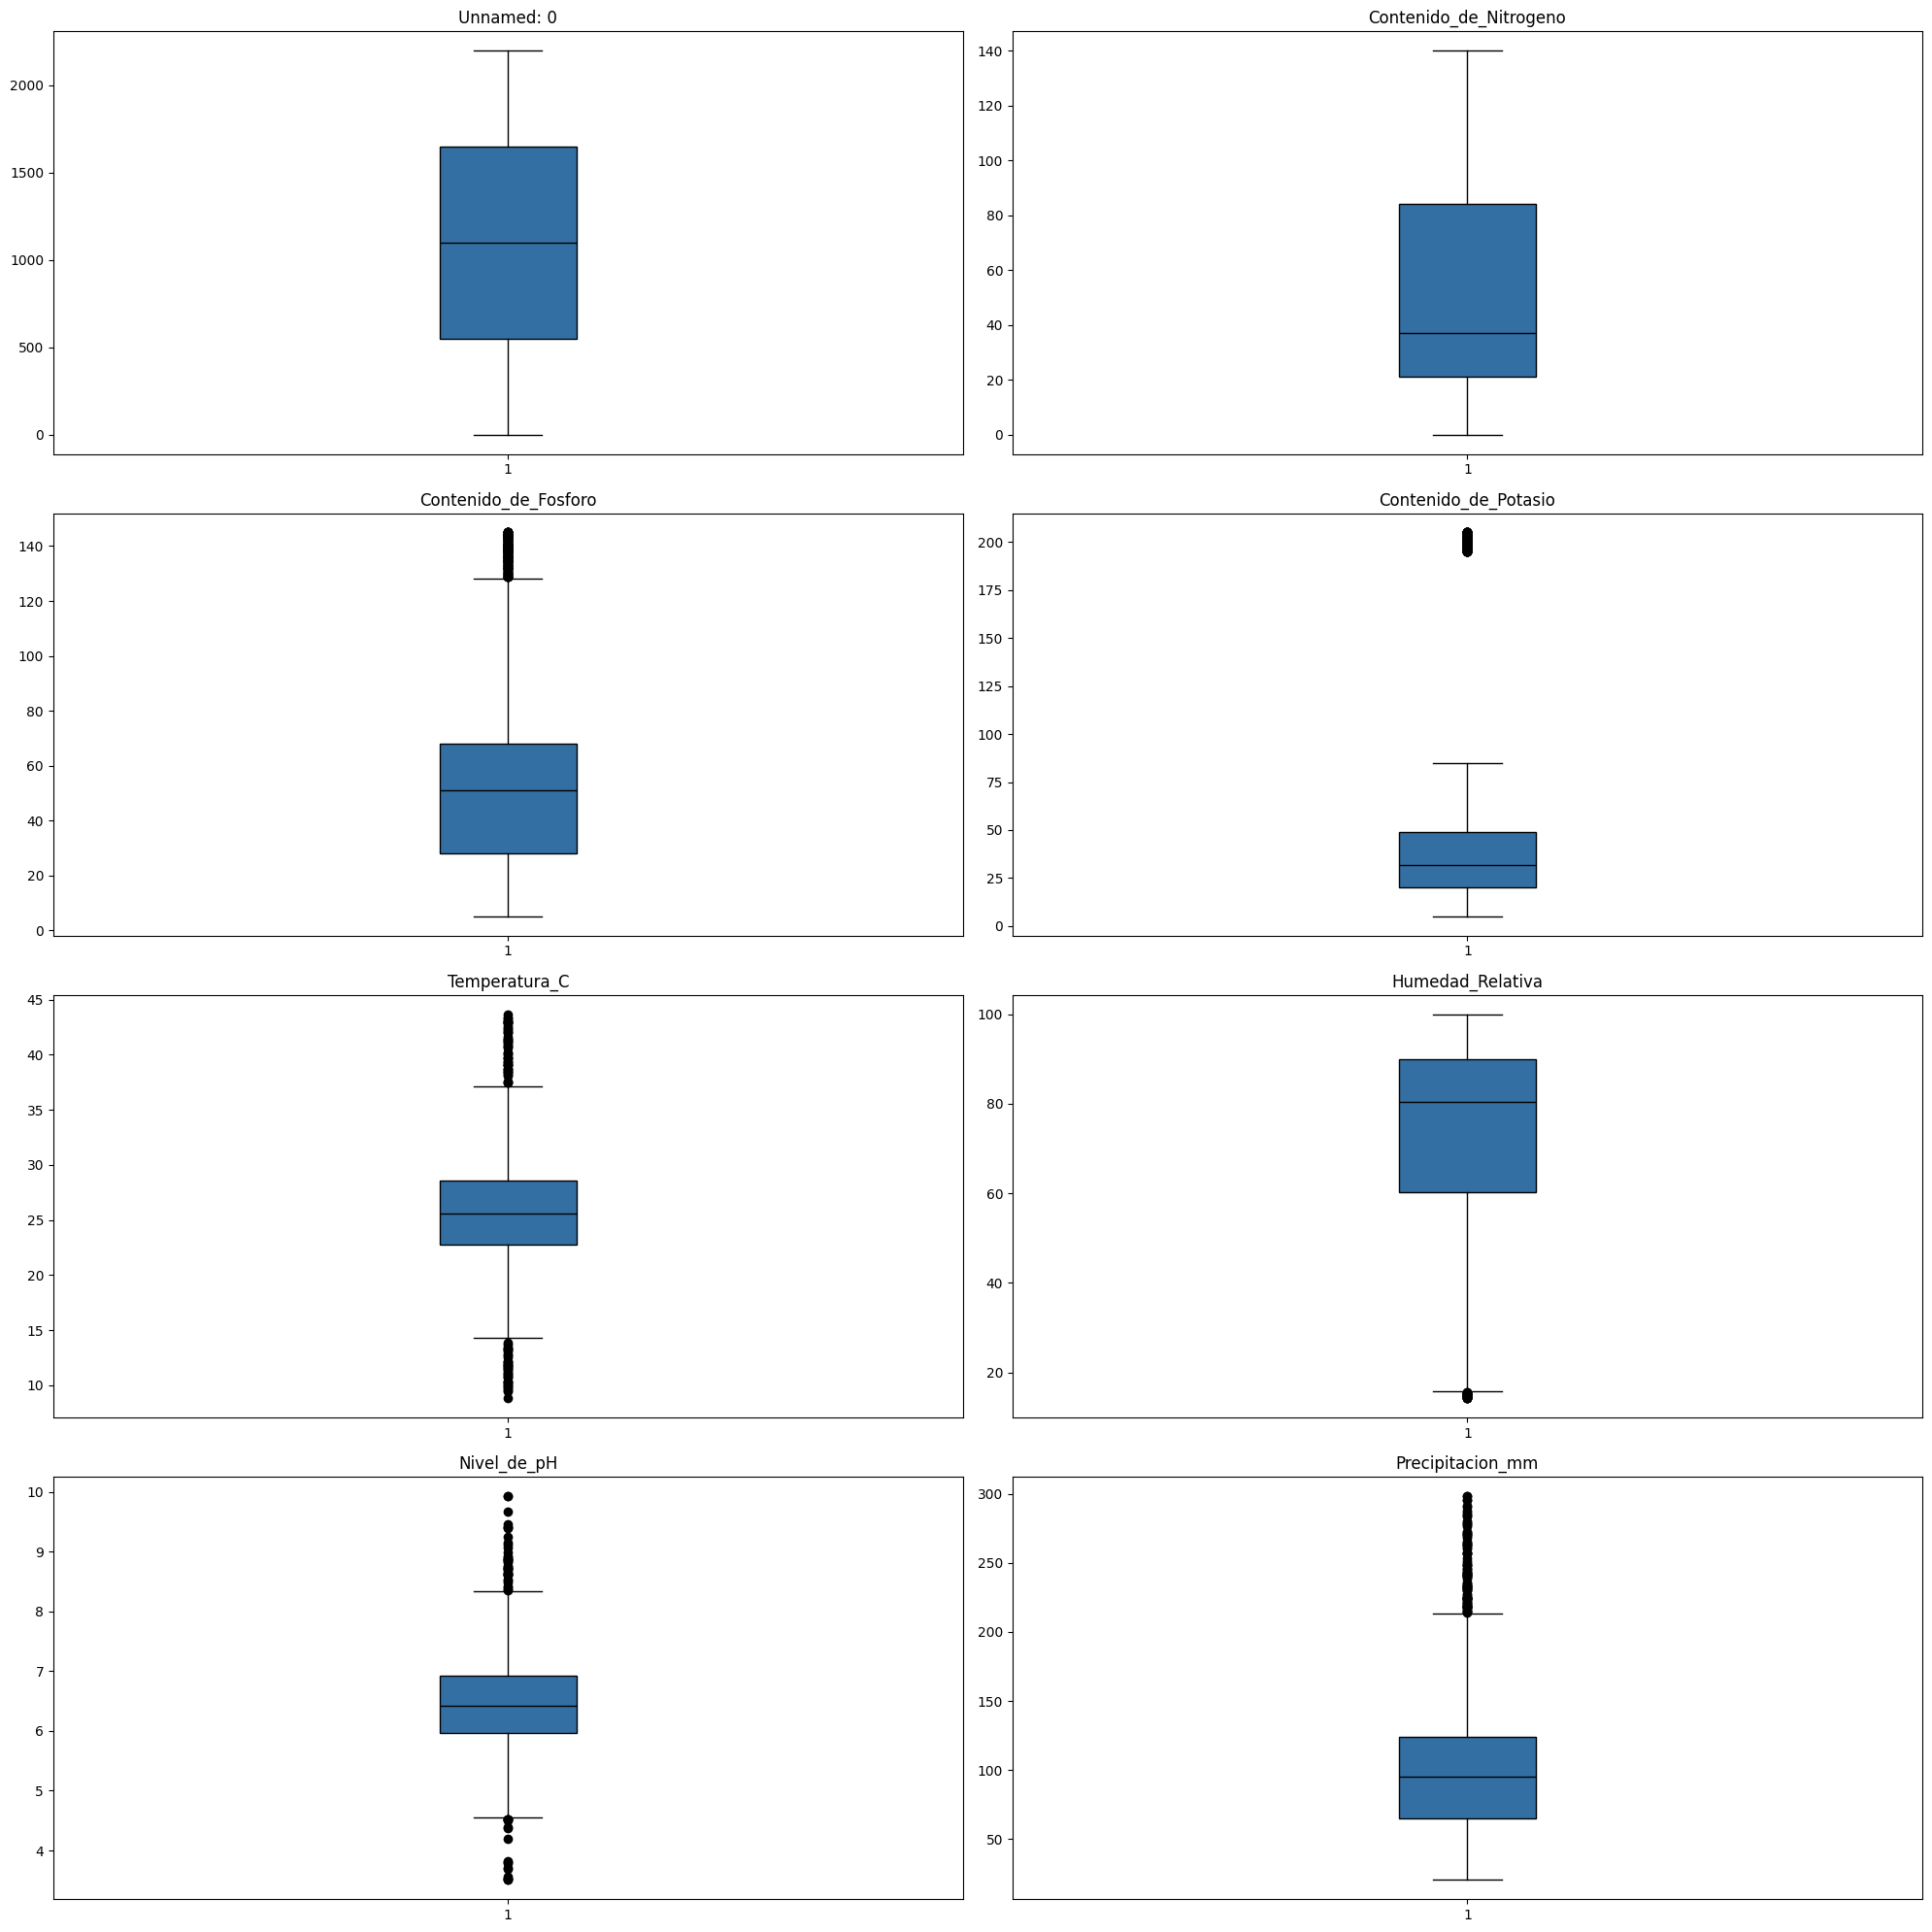

In [24]:
from funciones.exploratory_data_analysis import plot_outliers
plot_outliers(df_cultivos)

### Podemos concluir que, en este caso, no es necesario realizar un tratamiento específico de outliers en el dataset de cultivos, ya que los valores extremos pueden ser explicados por las variaciones naturales en las condiciones del suelo y del clima. Además las variables pueden ir cambiando en el tiempo y en base al cultivo que se este realizando.

In [25]:
"""
from funciones.exploratory_data_analysis import is_outlier

outliers_fosforo = is_outlier(df_cultivos["Contenido_de_Fosforo"], 1.5)
outlier_values_fosforo = df_cultivos["Contenido_de_Fosforo"][outliers_fosforo]

outliers_potasio = is_outlier(df_cultivos["Contenido_de_Potasio"], 1.5)
outlier_values_potasio = df_cultivos["Contenido_de_Potasio"][outliers_potasio]

outliers_temperatura = is_outlier(df_cultivos["Temperatura_C"], 1.5)
outlier_values_temperatura= df_cultivos["Temperatura_C"][outliers_temperatura]

outliers_humedad = is_outlier(df_cultivos["Humedad_Relativa"], 1.5)
outlier_values_humedad= df_cultivos["Humedad_Relativa"][outliers_humedad]

outliers_nivel_ph = is_outlier(df_cultivos["Nivel_de_pH"], 1.5)
outlier_values_nivel_ph = df_cultivos["Nivel_de_pH"][outliers_nivel_ph]

outliers_precipitacion = is_outlier(df_cultivos["Precipitacion_mm"], 1.5)
outlier_values_precipitacion = df_cultivos["Precipitacion_mm"][outliers_precipitacion]


print("Outliers de Contenido_de_Fosforo:")
print(outlier_values_fosforo)
print("")
print("Outliers de Contenido_de_Potasio:")
print(outlier_values_potasio)
print("")
print("Outliers de Temperatura_C:")
print(outlier_values_temperatura)
print("")
print("Outliers de Humedad_Relativa:")
print(outlier_values_humedad)
print("")
print("Outliers de Nivel_de_pH:")
print(outlier_values_nivel_ph)
print("")
print("Outliers de Precipitacion_mm:")
print(outlier_values_precipitacion)
"""

'\nfrom funciones.exploratory_data_analysis import is_outlier\n\noutliers_fosforo = is_outlier(df_cultivos["Contenido_de_Fosforo"], 1.5)\noutlier_values_fosforo = df_cultivos["Contenido_de_Fosforo"][outliers_fosforo]\n\noutliers_potasio = is_outlier(df_cultivos["Contenido_de_Potasio"], 1.5)\noutlier_values_potasio = df_cultivos["Contenido_de_Potasio"][outliers_potasio]\n\noutliers_temperatura = is_outlier(df_cultivos["Temperatura_C"], 1.5)\noutlier_values_temperatura= df_cultivos["Temperatura_C"][outliers_temperatura]\n\noutliers_humedad = is_outlier(df_cultivos["Humedad_Relativa"], 1.5)\noutlier_values_humedad= df_cultivos["Humedad_Relativa"][outliers_humedad]\n\noutliers_nivel_ph = is_outlier(df_cultivos["Nivel_de_pH"], 1.5)\noutlier_values_nivel_ph = df_cultivos["Nivel_de_pH"][outliers_nivel_ph]\n\noutliers_precipitacion = is_outlier(df_cultivos["Precipitacion_mm"], 1.5)\noutlier_values_precipitacion = df_cultivos["Precipitacion_mm"][outliers_precipitacion]\n\n\nprint("Outliers de C

In [26]:
df_cultivos.groupby("Tipo_de_Cultivo").agg({
    "Contenido_de_Fosforo": "mean",
    "Contenido_de_Potasio": "mean",
    "Temperatura_C": "mean"
}).sort_values(by="Contenido_de_Fosforo", ascending=False).reset_index()

,Tipo_de_Cultivo,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C
0,apple,134.22,199.89,22.630942
1,grapes,132.53,200.11,23.849575
2,banana,82.01,50.05,27.376798
3,lentil,68.36,19.41,24.509052
4,chickpea,67.79,79.92,18.872847
5,pigeonpeas,67.73,20.29,27.741762
6,kidneybeans,67.54,20.05,20.115085
7,blackgram,67.47,19.24,29.973340
8,papaya,59.05,50.04,33.723859
9,maize,48.44,19.79,22.389204


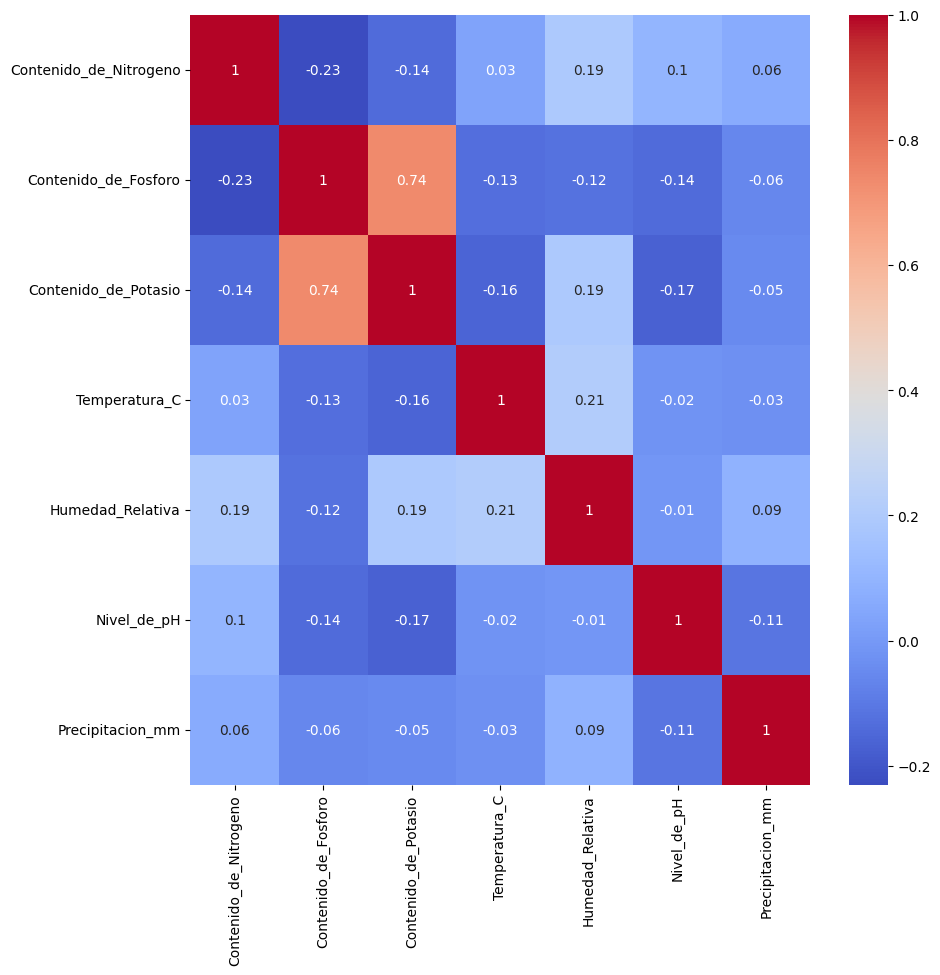

In [27]:
from funciones.machine_learning import crear_heatmap_correlacion
crear_heatmap_correlacion(df_cultivos)

## ***Correlaciones fuertes:***
(Las siguientes correlaciones indican que ambas variables están muy relacionadas entre sí y probablemente se pueden utilizar indistintamente en un modelo predictivo) 
##### → Las variables "Contenido_de_Potasio" y "Contenido_de_Fosforo" tienen una correlación fuerte de 0.74.

## ***Correlaciones débiles:***
(Las siguientes correlaciones indican que ambas variables NO están muy relacionadas entre sí y probablemente NO tengan un gran impacto en un modelo predictivo) 
##### → Las variables "Admin_Costs" y "Marketing_Expenditure" tienen una correlación débil de -0.1.
##### → Las variables "Admin_Costs" y "Net_Profit" tienen una correlación débil de -0.01.
##### → La variable "Employee_Count" tiene correlaciones débiles con otras variables (todas debajo de 0.2 - salvo con "Profit"), con la más fuerte siendo 0.17 con "Admin_Costs".


##### Es importante tener en cuenta que la correlación no implica causalidad, es decir, solo porque dos variables están correlacionadas entre sí no significa que una variable cause la otra. Por lo tanto, es necesario realizar un análisis más detallado para determinar las relaciones causales entre las variables.

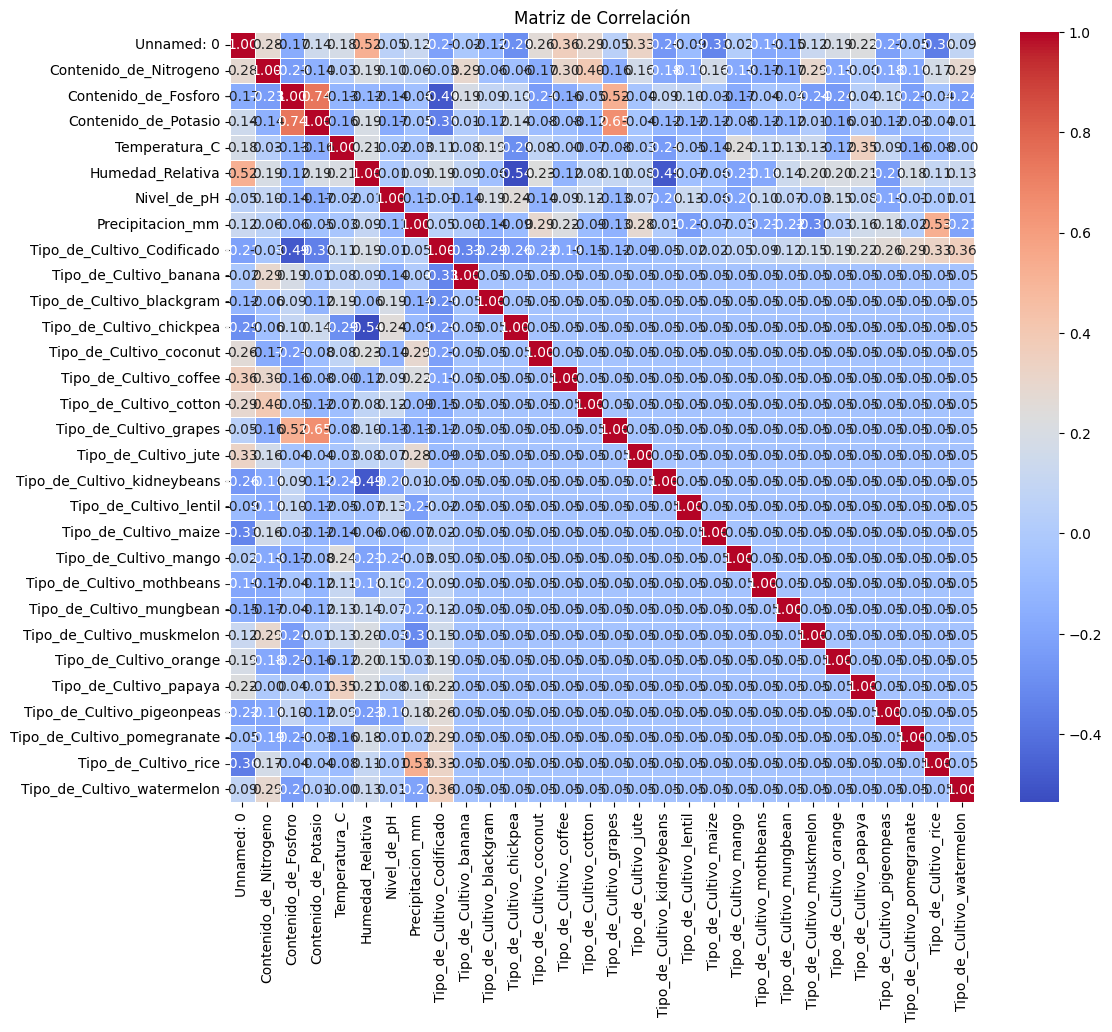

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset # Asegúrate de poner el nombre correcto de tu archivo CSV

# Codificación one-hot para la variable categórica
data_encoded = pd.get_dummies(df_cultivos, columns=['Tipo_de_Cultivo'], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = data_encoded.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


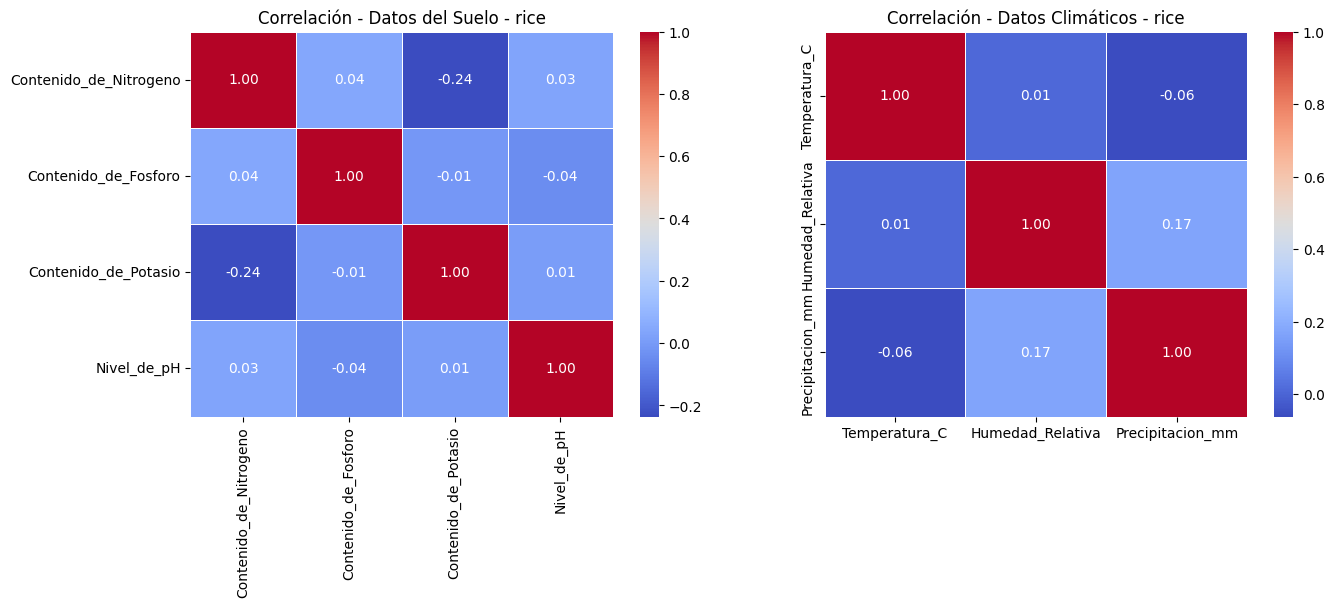

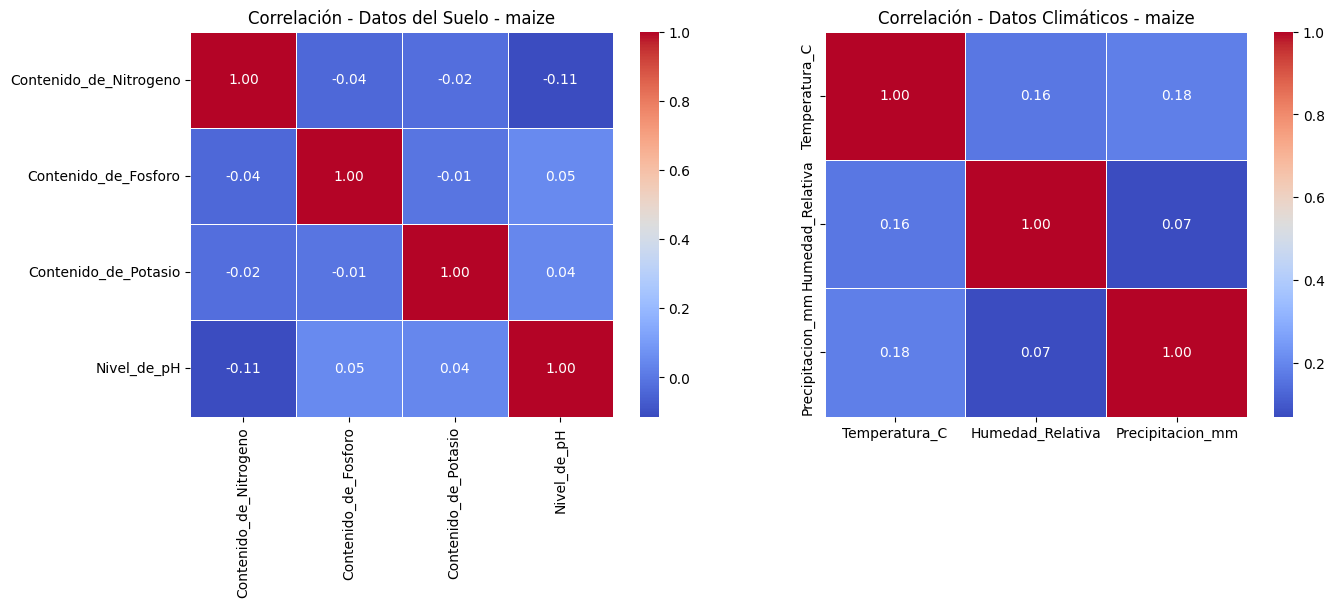

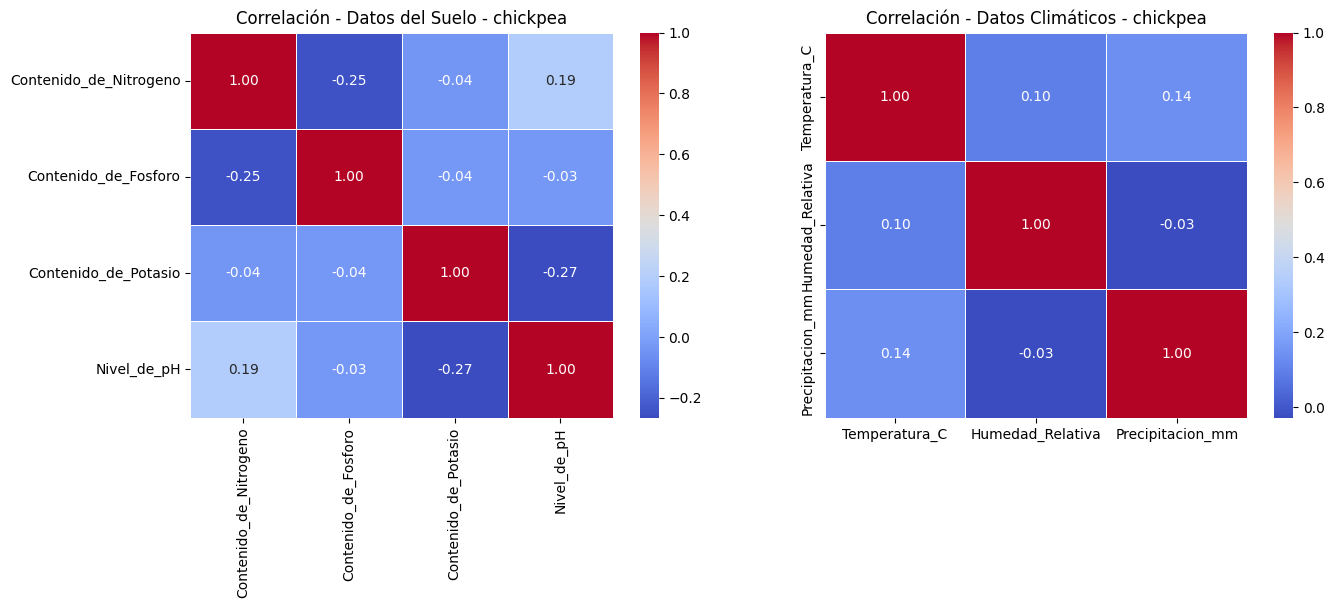

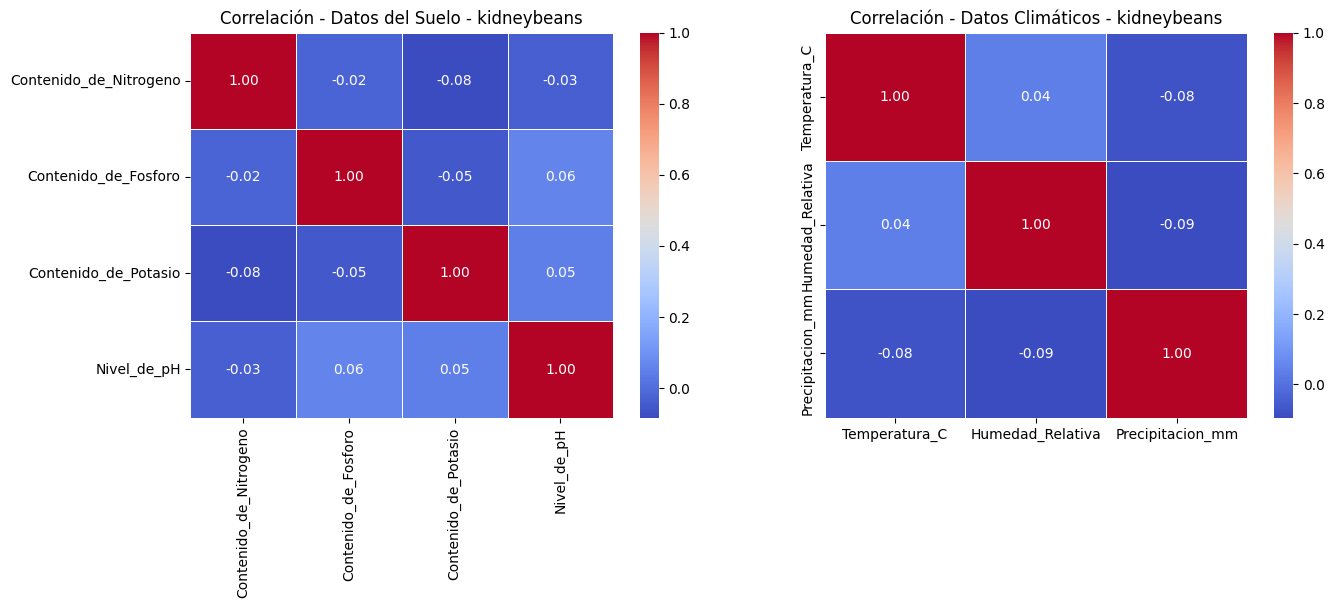

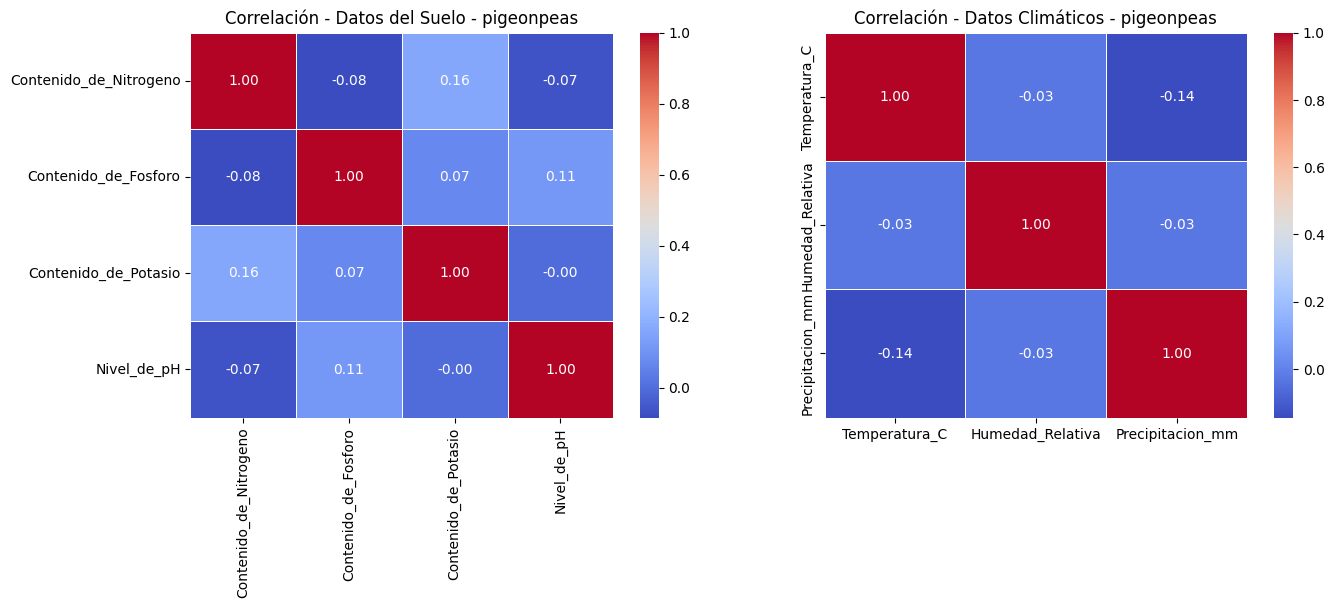

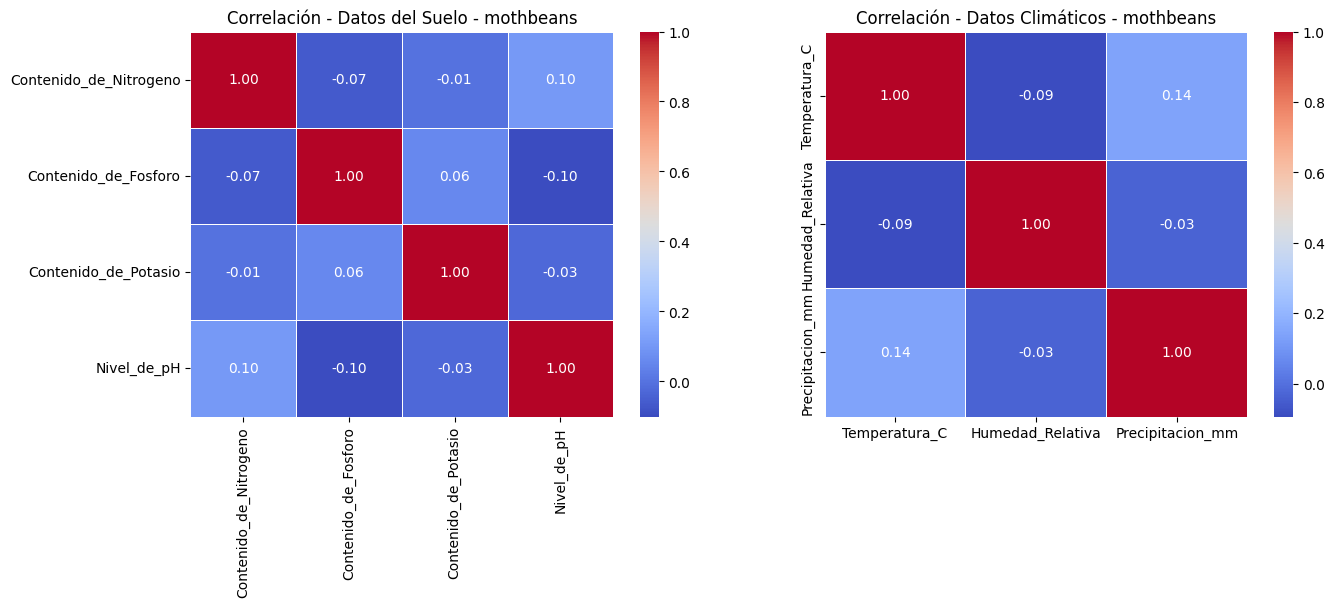

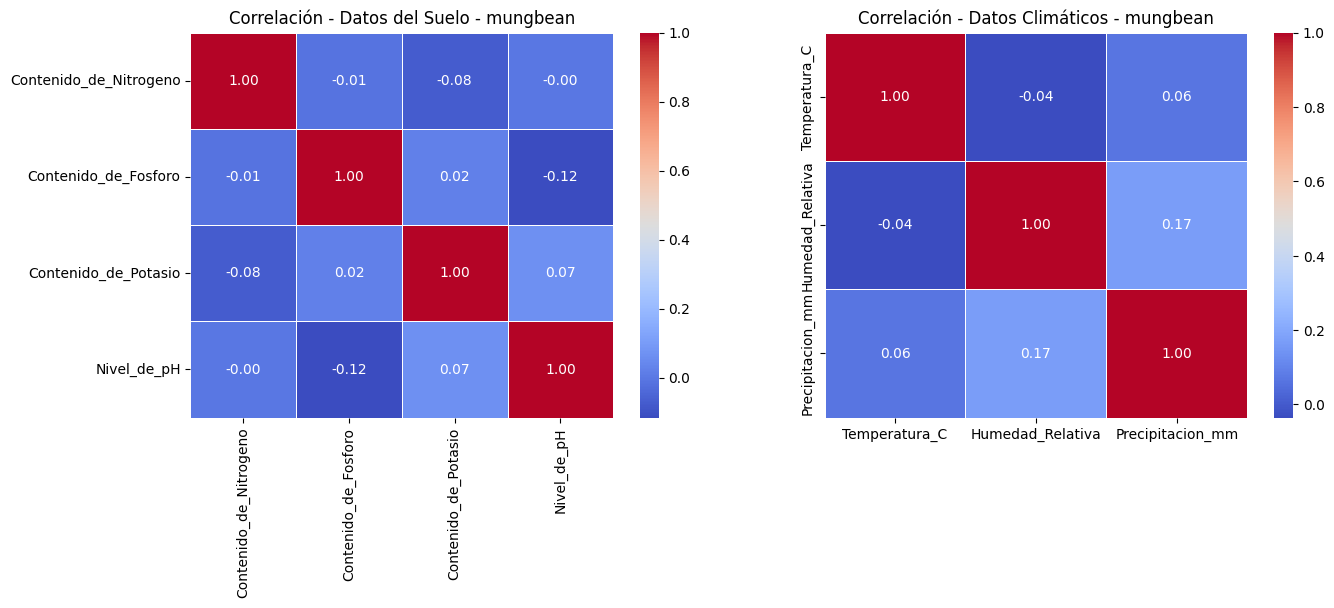

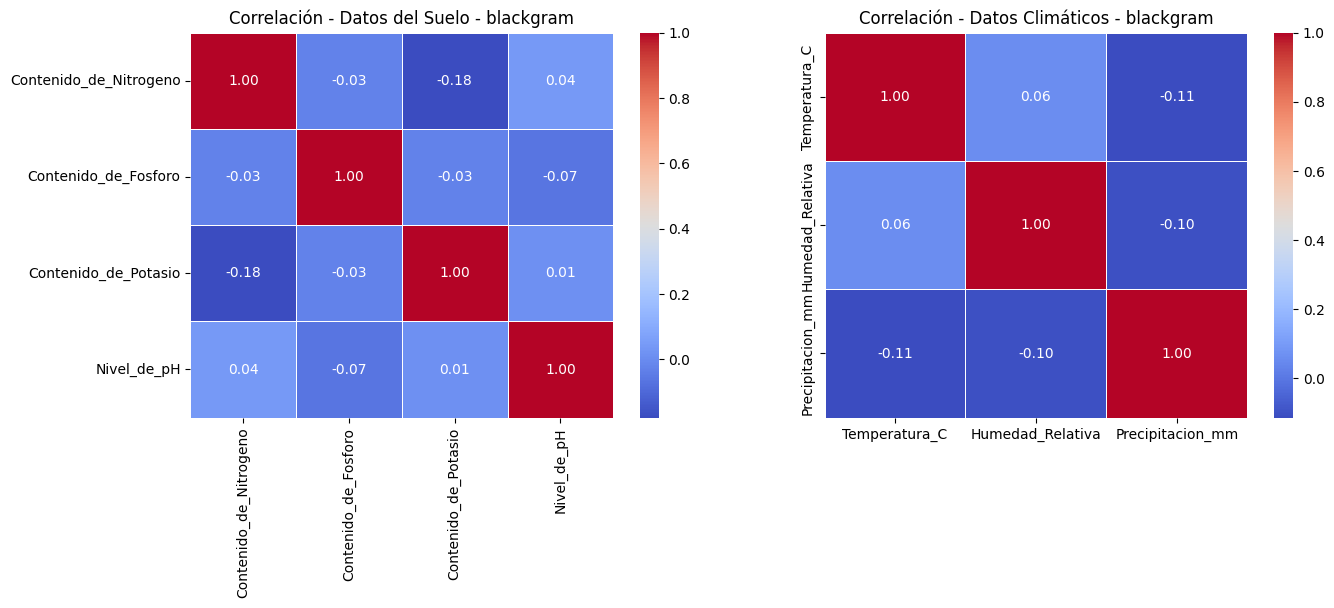

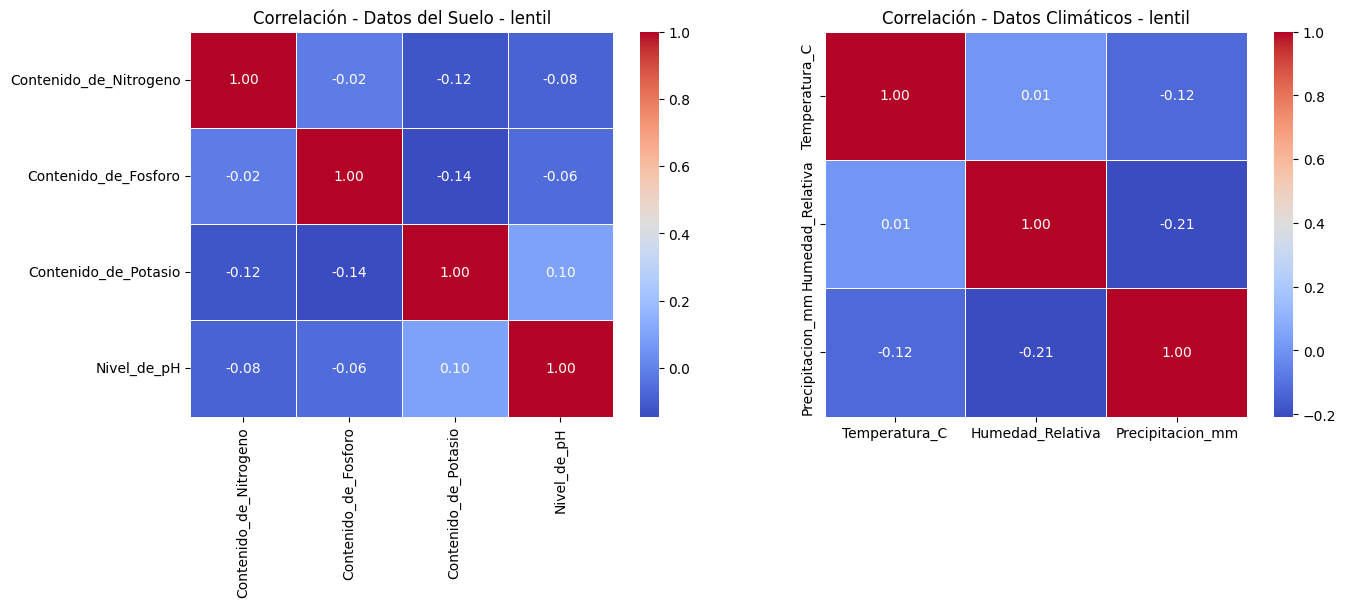

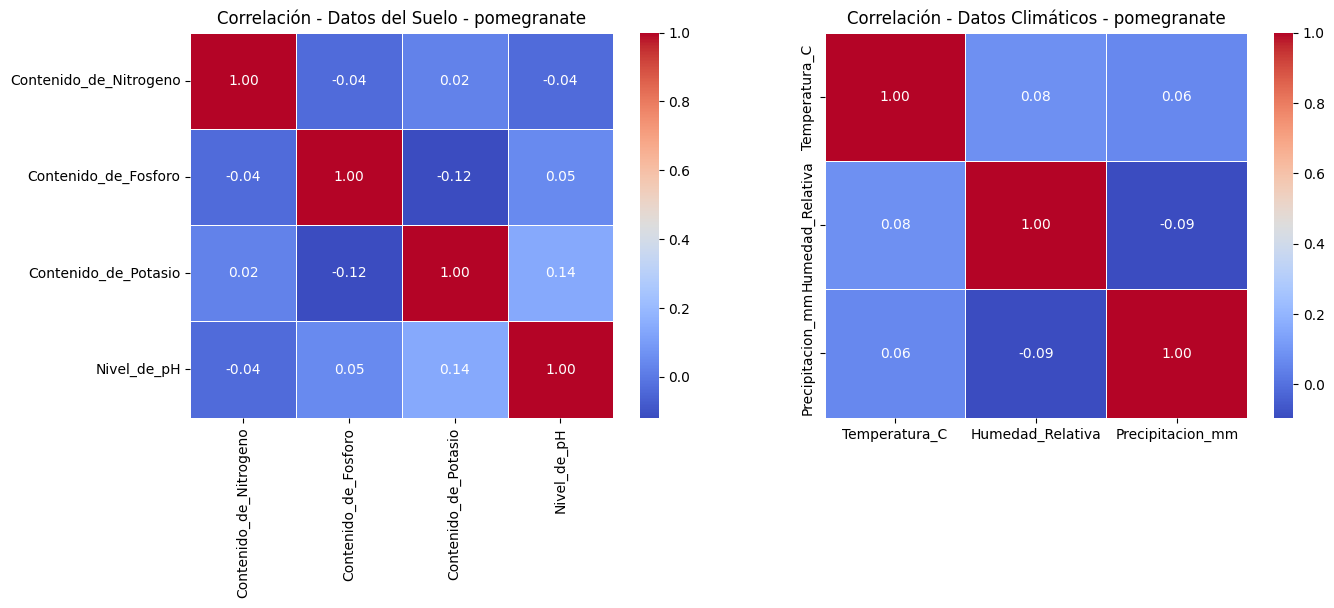

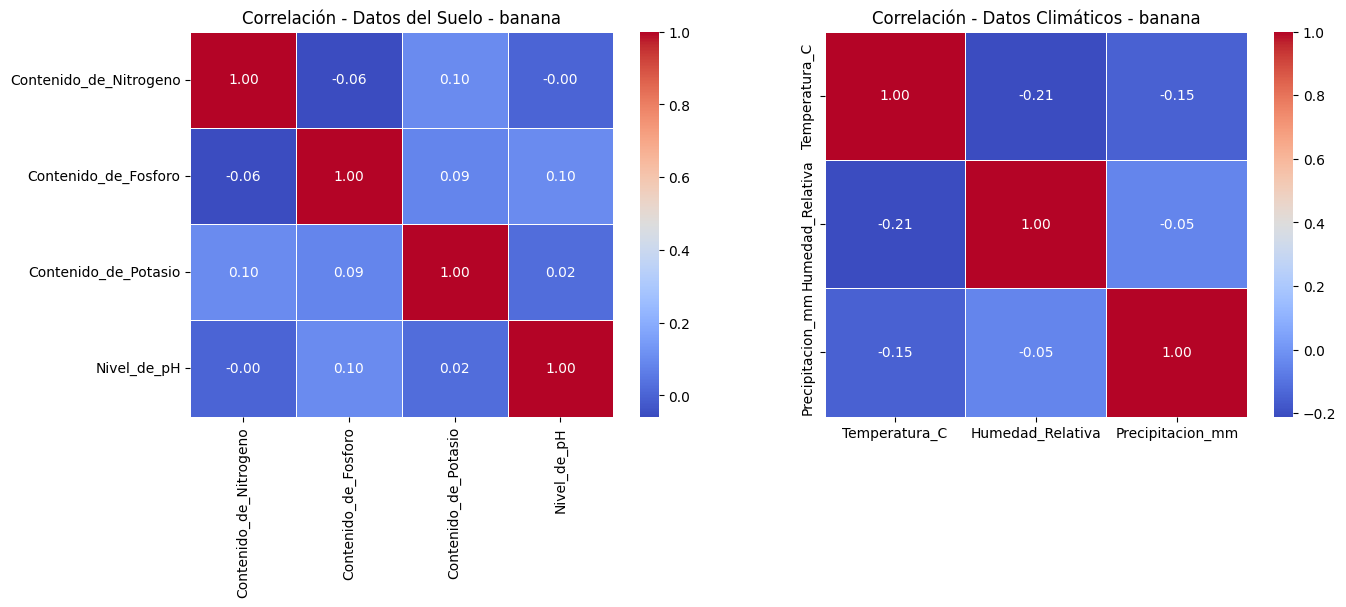

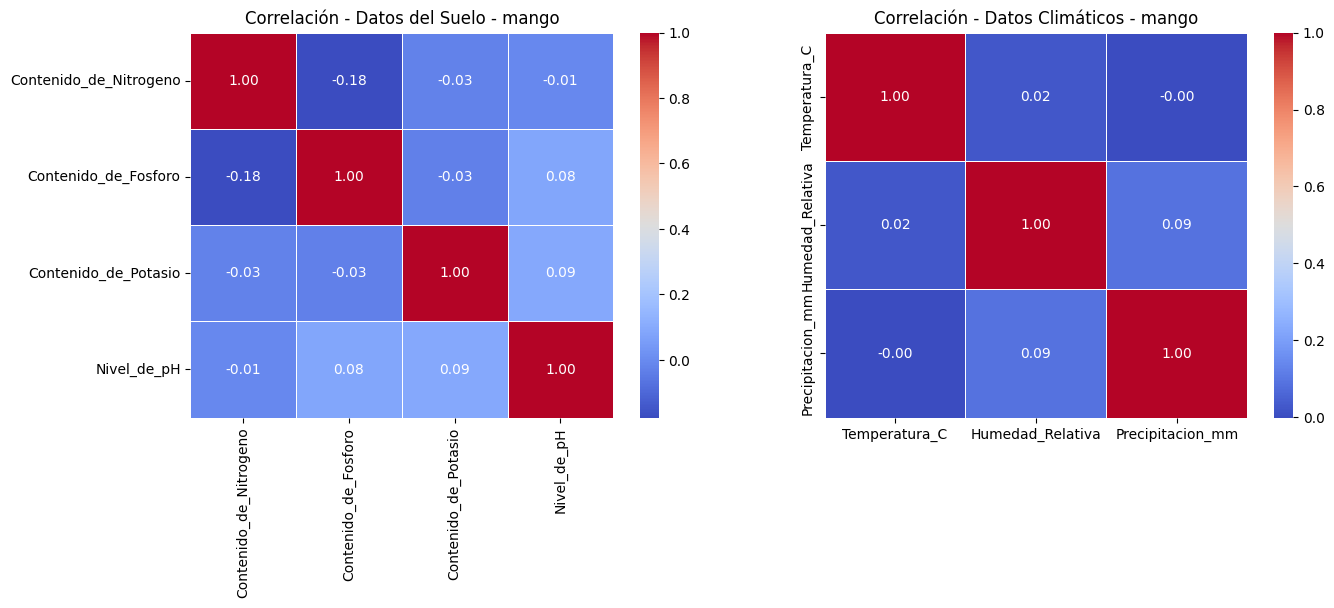

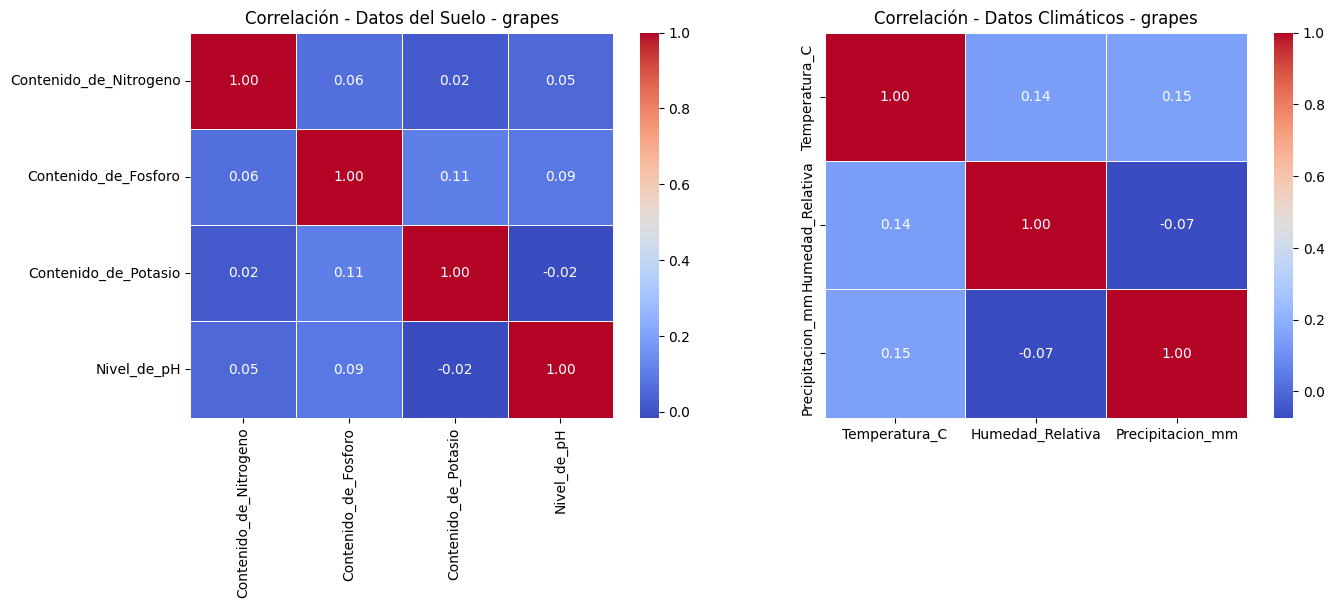

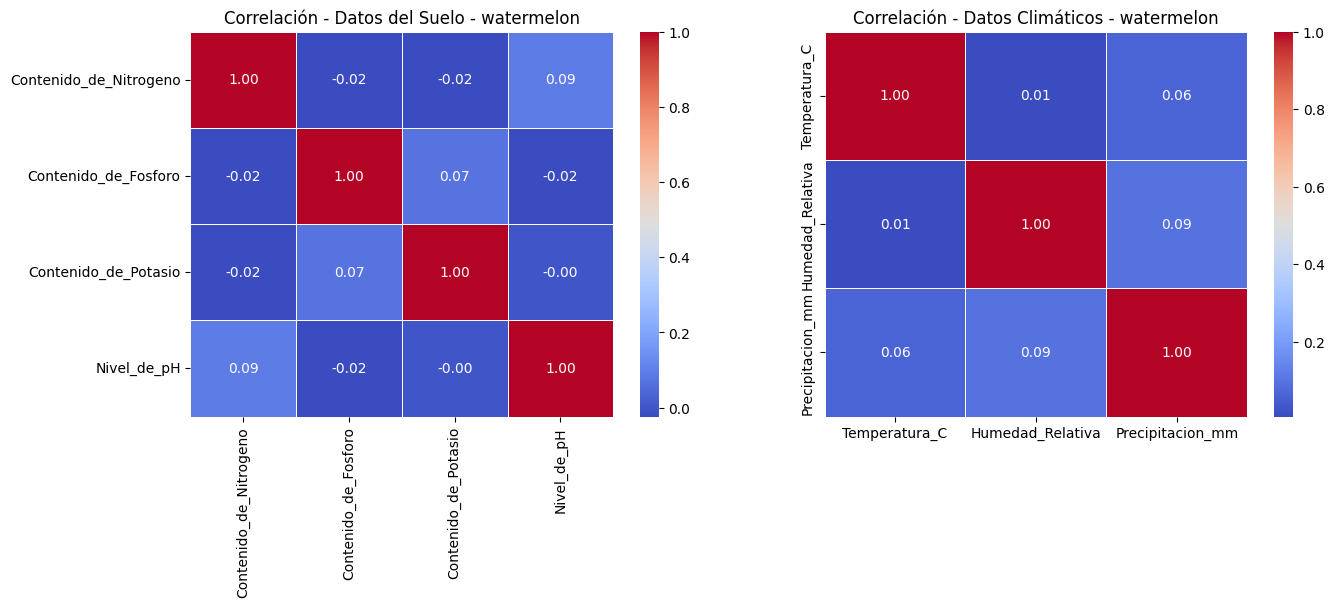

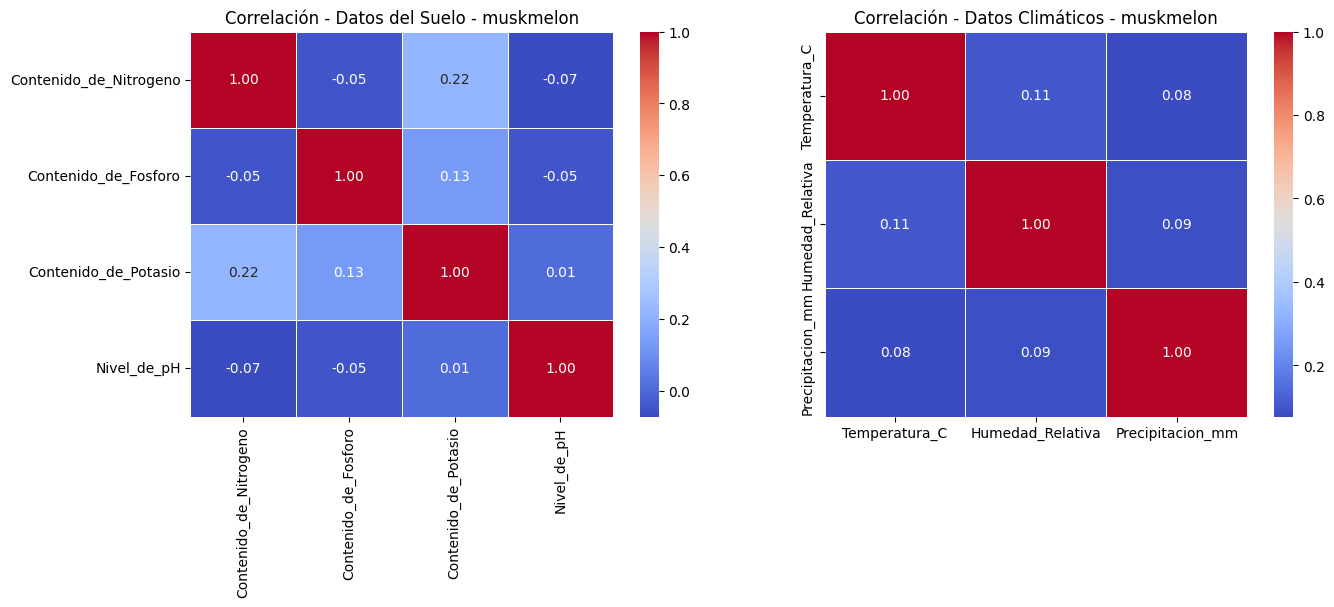

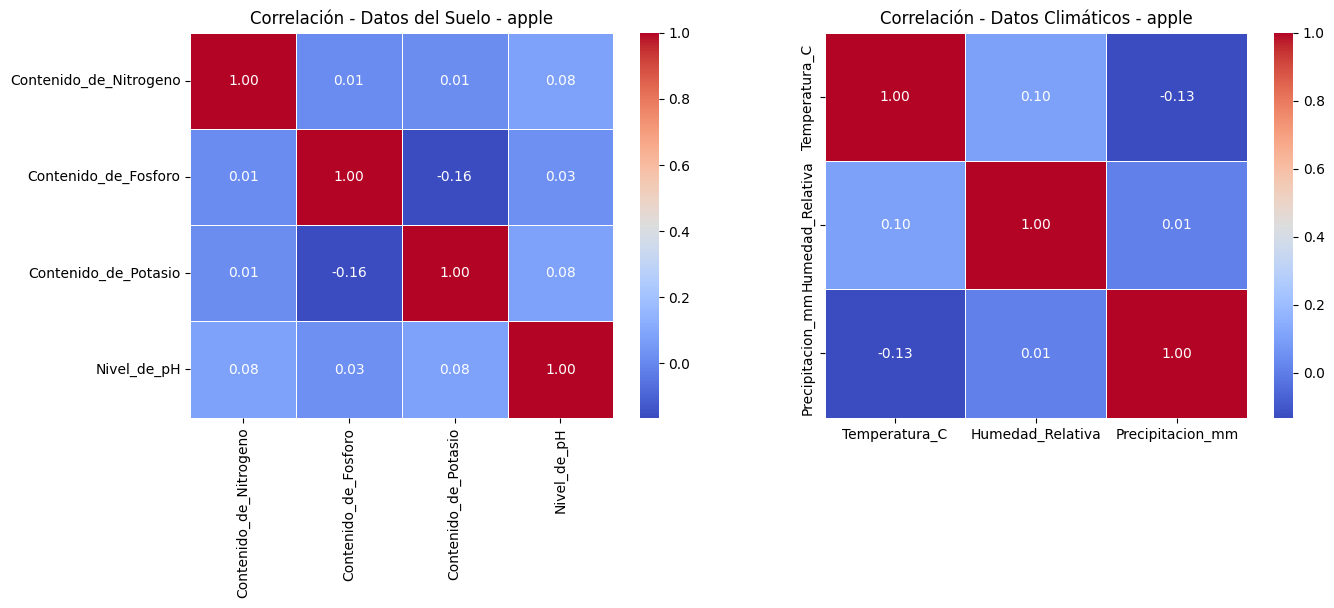

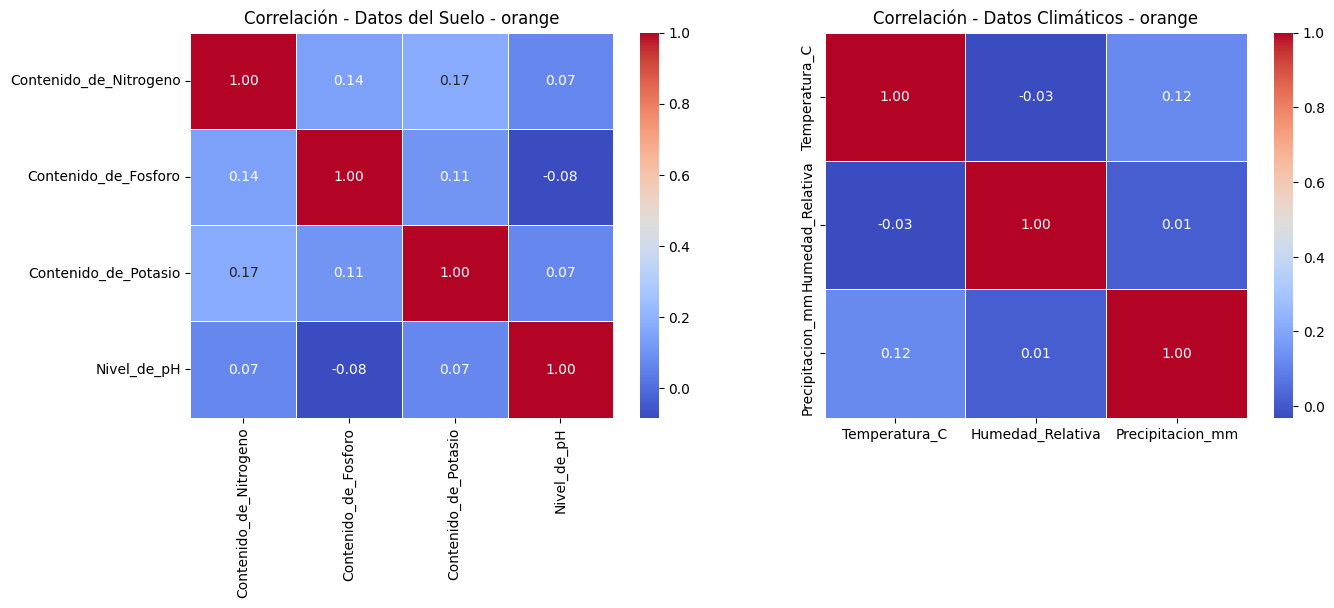

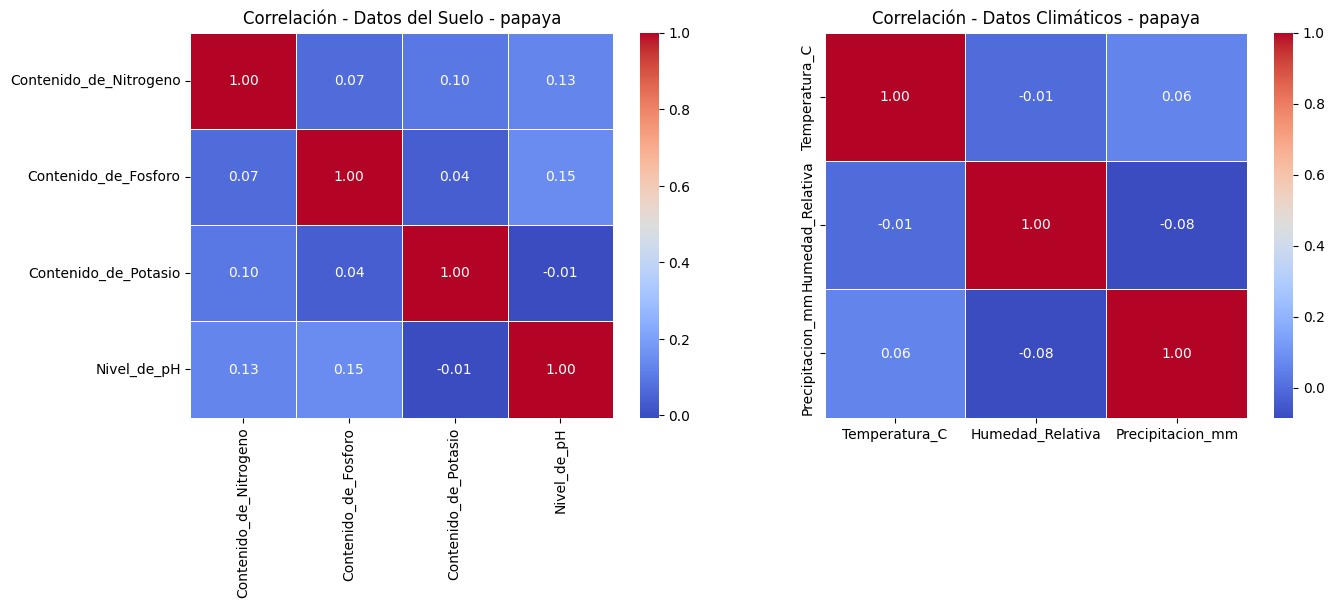

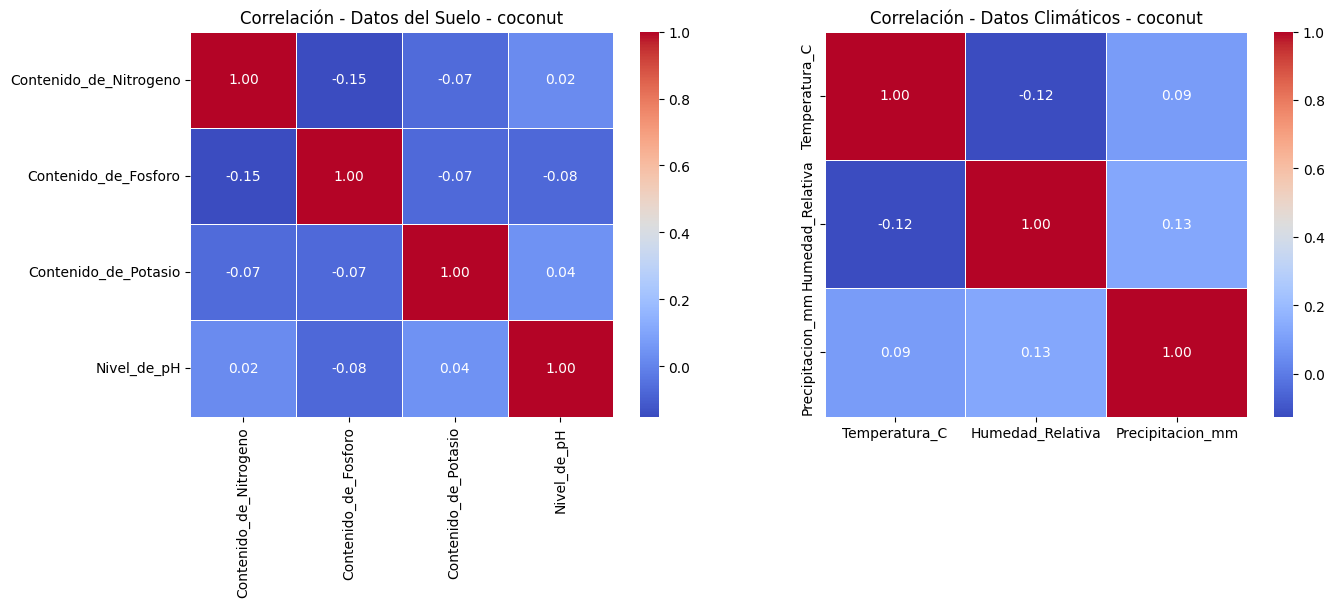

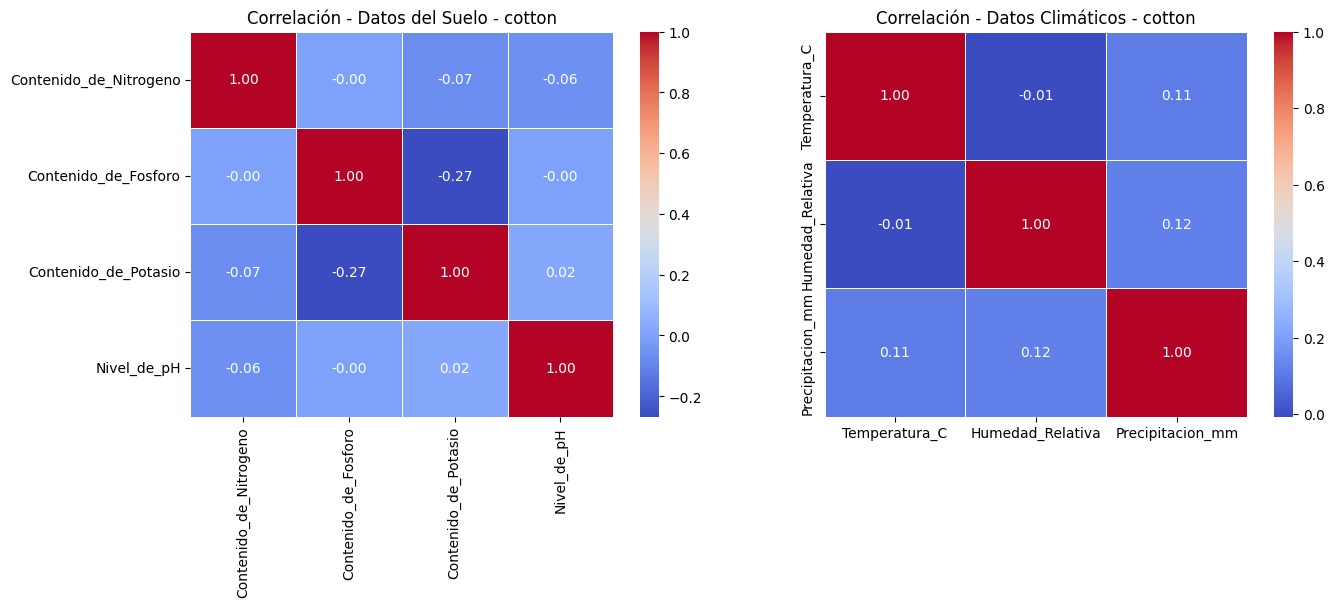

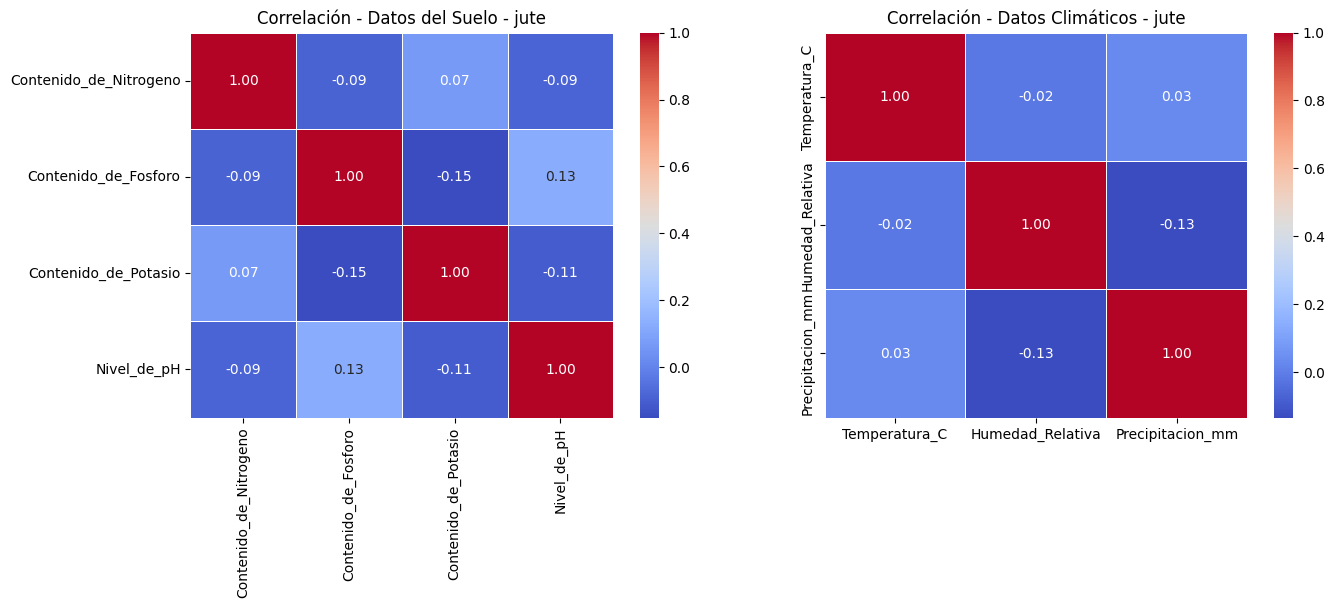

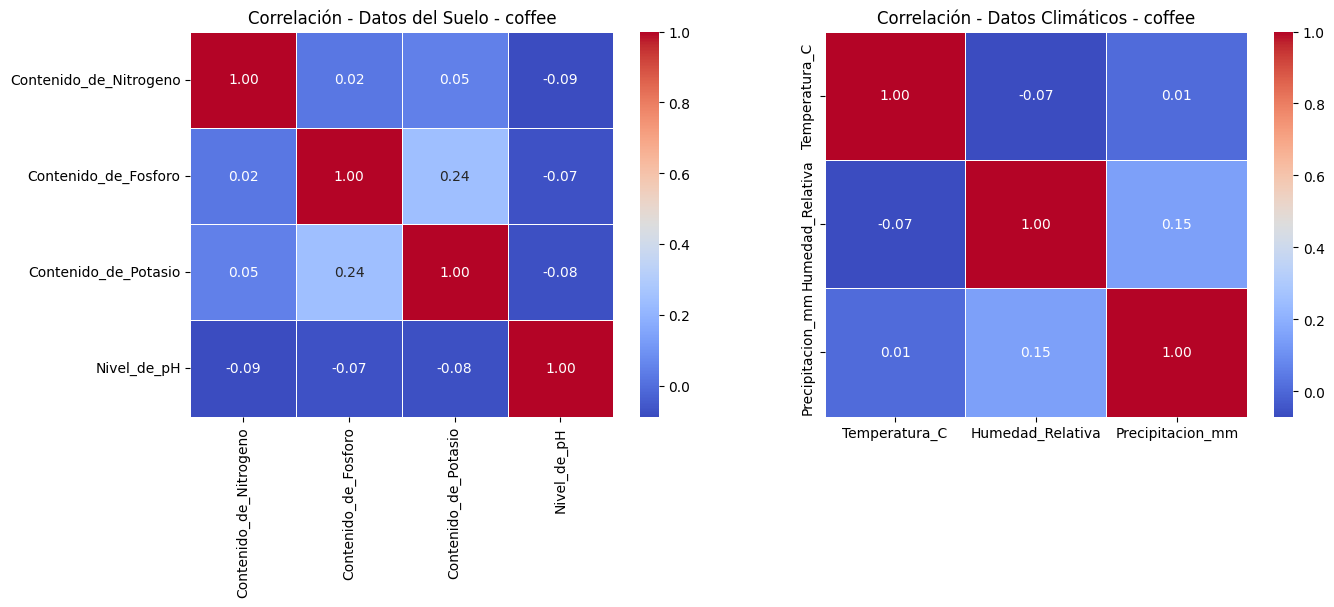

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la lista de tipos de cultivo únicos
tipos_de_cultivo = df_cultivos['Tipo_de_Cultivo'].unique()

# Iterar sobre cada tipo de cultivo
for cultivo in tipos_de_cultivo:
    # Filtrar el conjunto de datos para el tipo de cultivo actual
    subset_data = df_cultivos[df_cultivos['Tipo_de_Cultivo'] == cultivo]
    
    # Dividir variables en grupos
    soil_data = subset_data[['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Nivel_de_pH']]
    climate_data = subset_data[['Temperatura_C', 'Humedad_Relativa', 'Precipitacion_mm']]
    
    # Calcular las matrices de correlación por grupos
    soil_corr = soil_data.corr()
    climate_corr = climate_data.corr()

    # Visualizar mapas de calor por grupos
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.heatmap(soil_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, ax=axes[0])
    axes[0].set_title(f'Correlación - Datos del Suelo - {cultivo}')

    sns.heatmap(climate_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, ax=axes[1])
    axes[1].set_title(f'Correlación - Datos Climáticos - {cultivo}')

    plt.show()


___

## → Recomendación de cultivo según condiciones del suelo y el clima

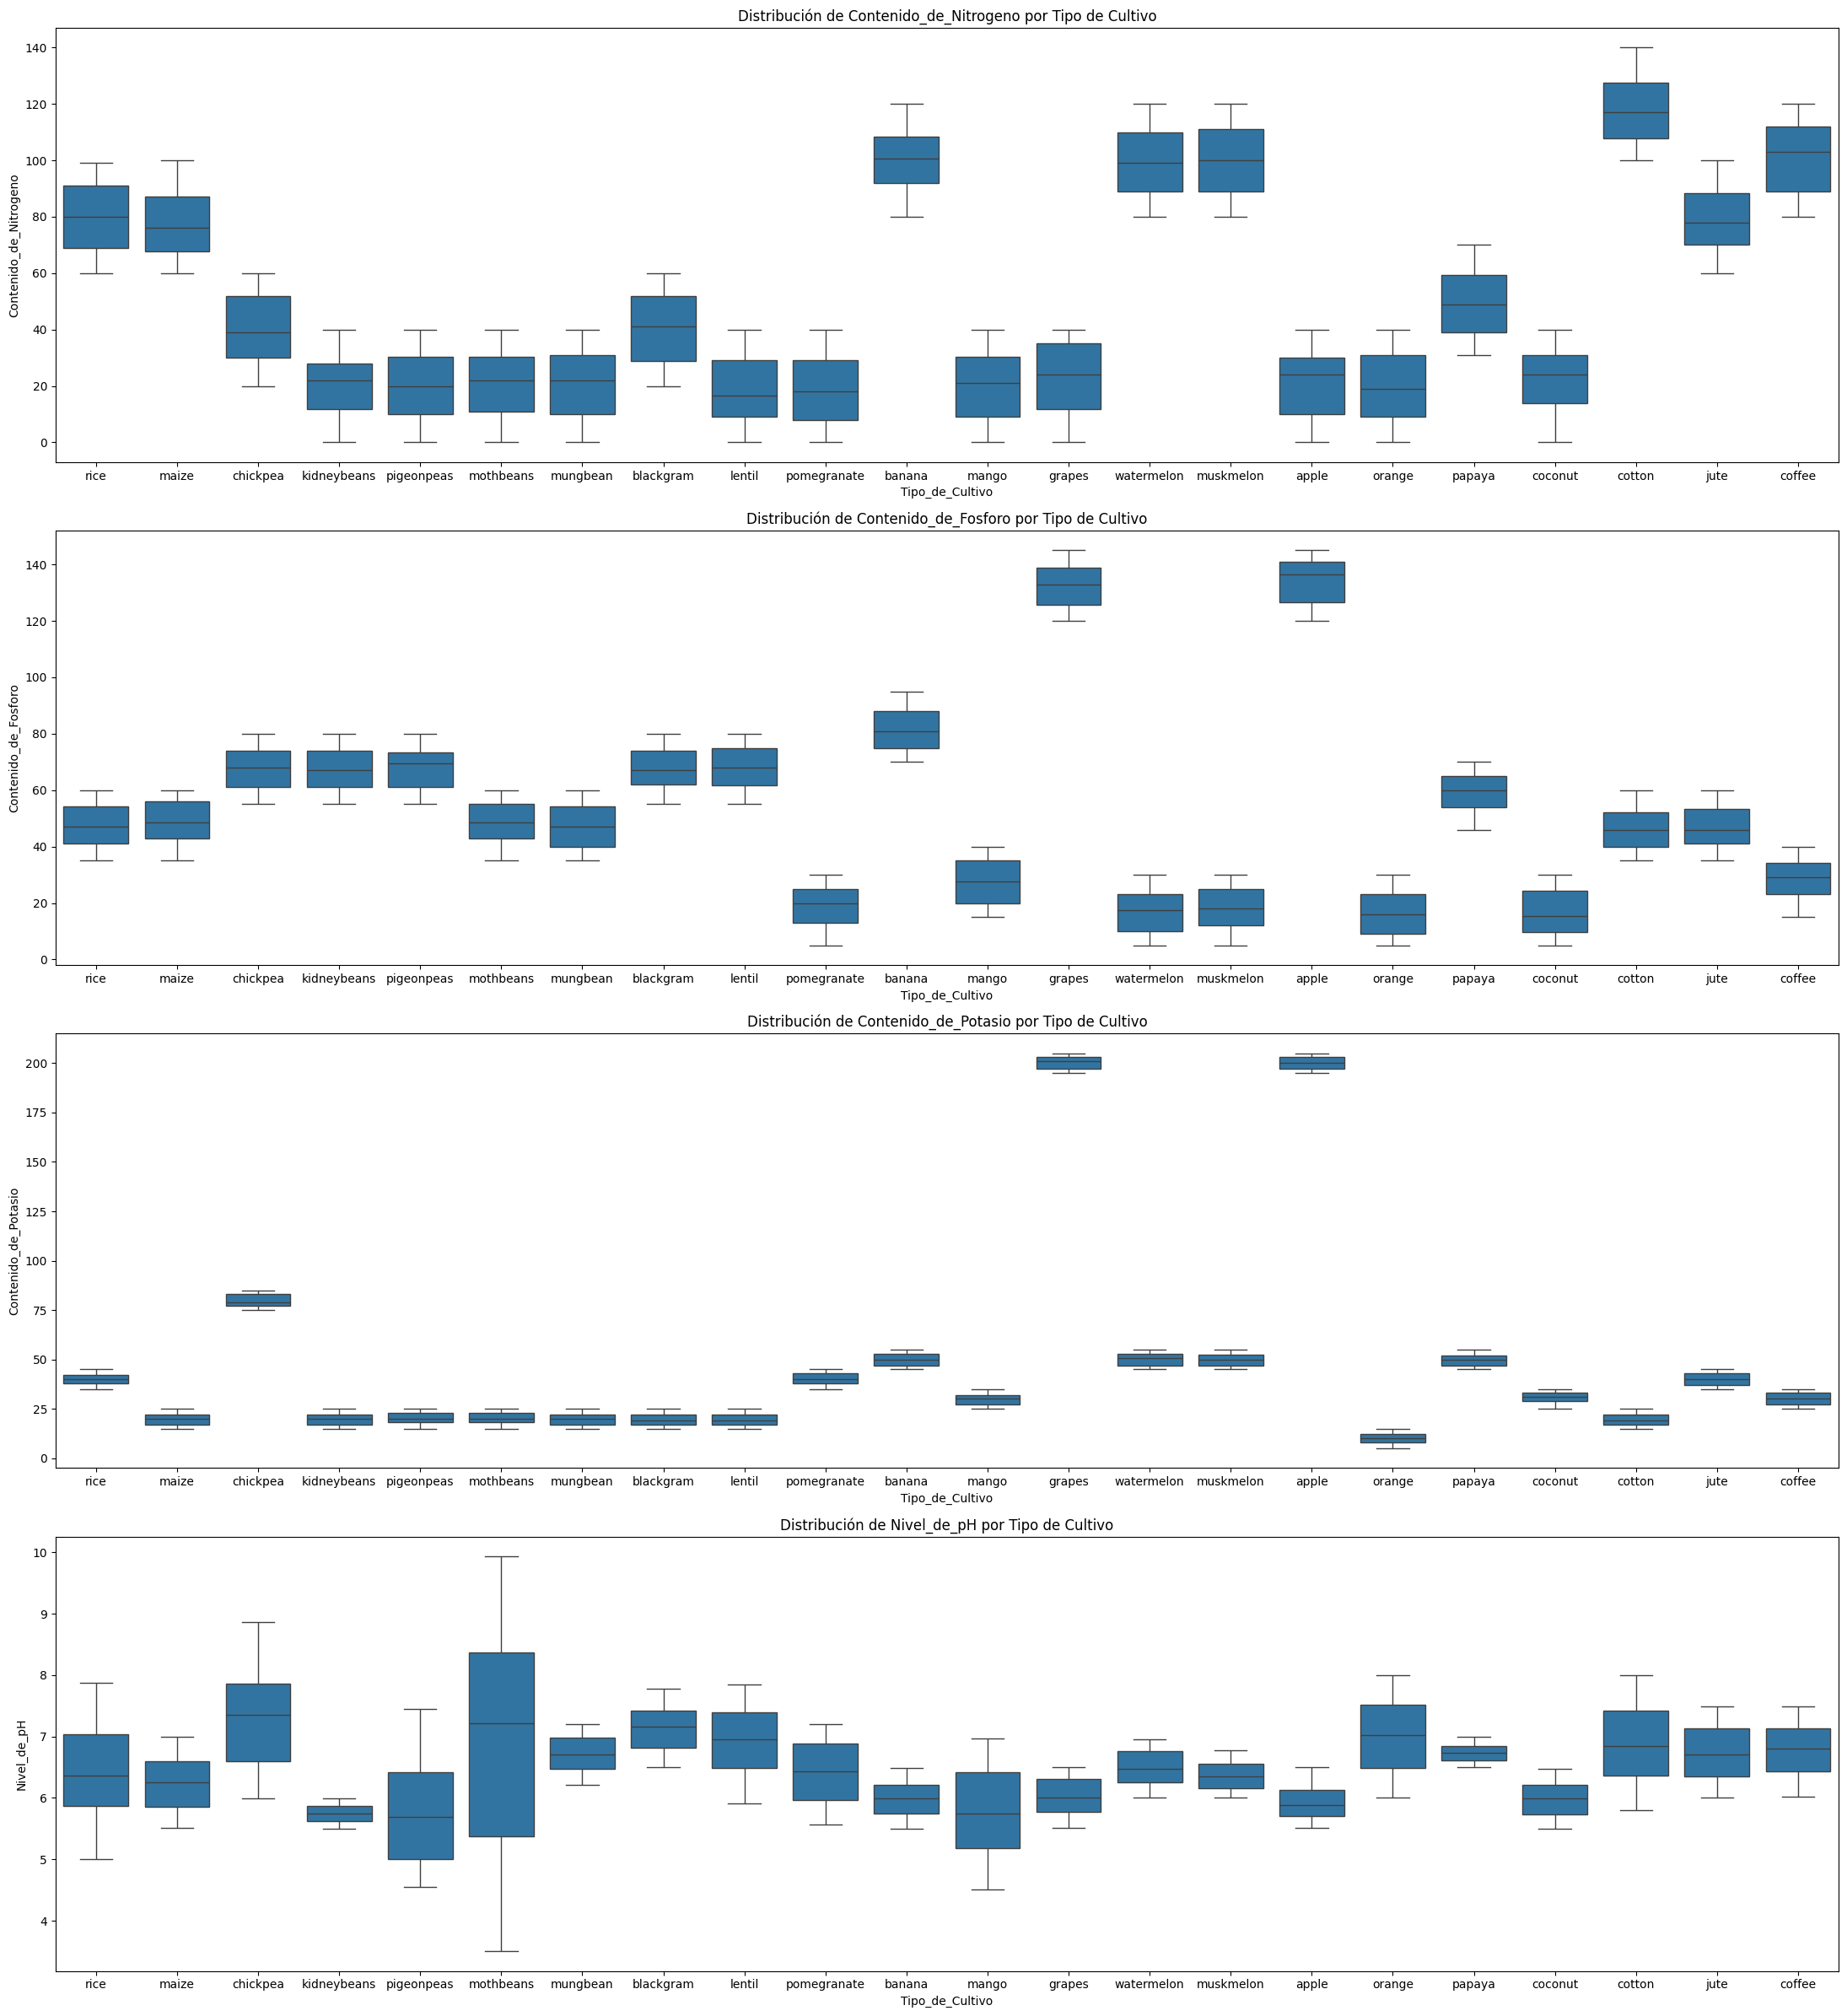

In [55]:
suelo_variables = ['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Nivel_de_pH']

plt.figure(figsize=(22, 24))
for i, variable in enumerate(suelo_variables, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x='Tipo_de_Cultivo', y=variable, data=df_cultivos)
    plt.title(f'Distribución de {variable} por Tipo de Cultivo')

plt.tight_layout()
plt.show()

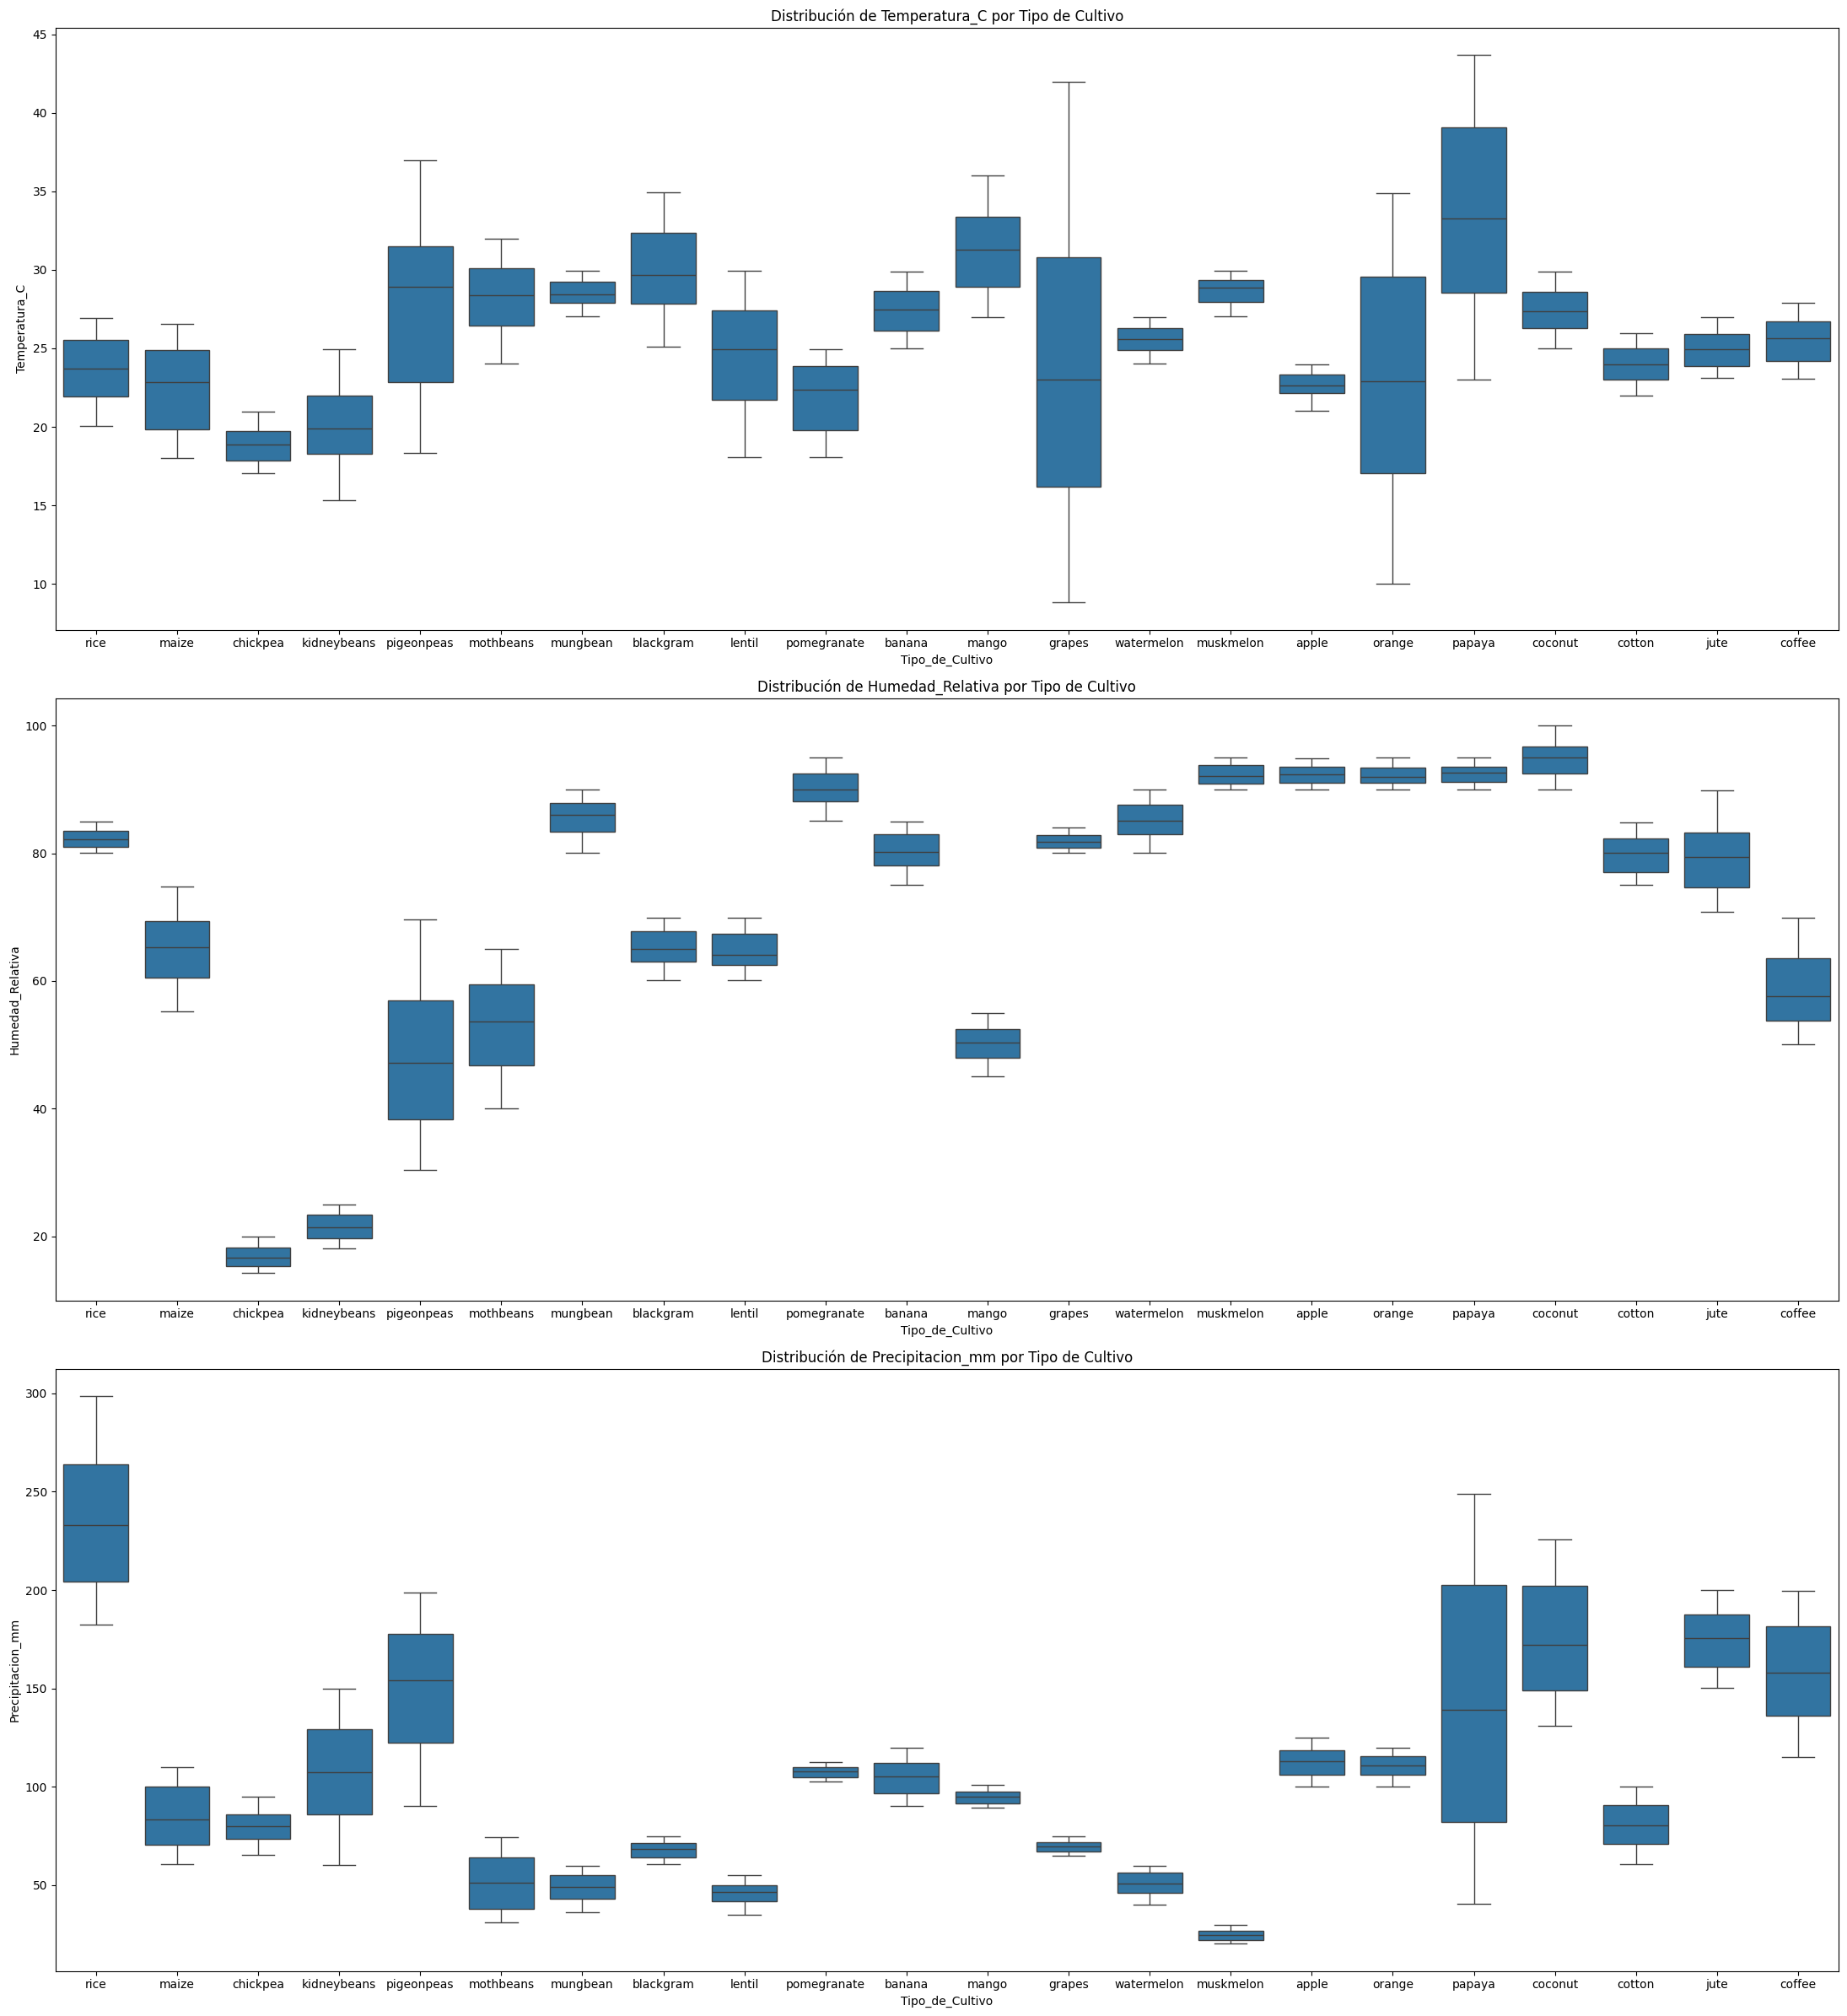

In [57]:
clima_variables = ['Temperatura_C', 'Humedad_Relativa', 'Precipitacion_mm']

plt.figure(figsize=(22, 24))
for i, variable in enumerate(clima_variables, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='Tipo_de_Cultivo', y=variable, data=df_cultivos)
    plt.title(f'Distribución de {variable} por Tipo de Cultivo')

plt.tight_layout()
plt.show()